---
title: "resampling"
execute:
  freeze: auto  # re-render only when source changes
---

We can only really understand how to calculate monthly means if we do it ourselves.

First, let's import a bunch of packages we need to use.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
%matplotlib widget

Now we load the csv file for Jerusalem (2019), provided by the [IMS](https://ims.gov.il/en/data_gov).

* We substitute every occurence of `-` for NaN (not a number, that is, the data is missing).
* We call the columns `Temperature (°C)` and `Rainfall (mm)` with more convenient names, since we will be using them a lot.
* We interpret the column `Date & Time (Winter)` as a date, saying to python that day comes first.
* We make `date` the index of the dataframe.

In [2]:
filename = "../archive/data/jerusalem2019.csv"
df = pd.read_csv(filename, na_values=['-'])
df.rename(columns={'Temperature (°C)': 'temperature',
                   'Rainfall (mm)': 'rain'}, inplace=True)
df['date'] = pd.to_datetime(df['Date & Time (Winter)'], dayfirst=True)
df = df.set_index('date')
df

,Station,Date & Time (Winter),Diffused radiation (W/m^2),Global radiation (W/m^2),Direct radiation (W/m^2),Relative humidity (%),temperature,Maximum temperature (°C),Minimum temperature (°C),Wind direction (°),Gust wind direction (°),Wind speed (m/s),Maximum 1 minute wind speed (m/s),Maximum 10 minutes wind speed (m/s),Time ending maximum 10 minutes wind speed (hhmm),Gust wind speed (m/s),Standard deviation wind direction (°),rain
date,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,Jerusalem Givat Ram,01/01/2019 00:00,0.0,0.0,0.0,80.0,8.7,8.8,8.6,75.0,84.0,3.3,4.3,3.5,23:58,6.0,15.6,0.0
2019-01-01 00:10:00,Jerusalem Givat Ram,01/01/2019 00:10,0.0,0.0,0.0,79.0,8.7,8.8,8.7,74.0,82.0,3.3,4.1,3.3,00:01,4.9,14.3,0.0
2019-01-01 00:20:00,Jerusalem Givat Ram,01/01/2019 00:20,0.0,0.0,0.0,79.0,8.7,8.8,8.7,76.0,82.0,3.2,4.1,3.3,00:19,4.9,9.9,0.0
2019-01-01 00:30:00,Jerusalem Givat Ram,01/01/2019 00:30,0.0,0.0,0.0,79.0,8.7,8.7,8.6,78.0,73.0,3.6,4.2,3.6,00:30,5.2,11.7,0.0
2019-01-01 00:40:00,Jerusalem Givat Ram,01/01/2019 00:40,0.0,0.0,0.0,79.0,8.6,8.7,8.5,80.0,74.0,3.6,4.4,3.8,00:35,5.4,10.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:20:00,Jerusalem Givat Ram,31/12/2019 22:20,0.0,0.0,1.0,81.0,7.4,7.6,7.3,222.0,255.0,0.5,0.9,1.0,22:11,1.0,47.9,0.0
2019-12-31 22:30:00,Jerusalem Givat Ram,31/12/2019 22:30,0.0,0.0,1.0,83.0,7.3,7.4,7.3,266.0,259.0,0.6,0.8,0.6,22:28,1.1,22.8,0.0
2019-12-31 22:40:00,Jerusalem Givat Ram,31/12/2019 22:40,0.0,0.0,1.0,83.0,7.5,7.6,7.3,331.0,317.0,0.5,0.8,0.6,22:35,1.0,31.6,0.0


With `resample` it's easy to compute monthly averages. Resample by itself only divides the data into buckets (in this case monthly buckets), and waits for a further instruction. Here, the next instruction is `mean`.

In [3]:
df_month = df['temperature'].resample('M').mean()
df_month

date
2019-01-31     9.119937
2019-02-28     9.629812
2019-03-31    10.731571
2019-04-30    14.514329
2019-05-31    22.916894
2019-06-30    23.587361
2019-07-31    24.019403
2019-08-31    24.050822
2019-09-30    22.313287
2019-10-31    20.641868
2019-11-30    17.257153
2019-12-31    11.224131
Freq: M, Name: temperature, dtype: float64

Instead of `M` for month, which other options do I have? The full list can be [found here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases), but the most commonly used are:

```
M         month end frequency
MS        month start frequency
A         year end frequency
AS, YS    year start frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
```

The results we got for the monthly means were given as a pandas series, not dataframe. Let's correct this:

In [4]:
df_month = df['temperature'].resample('M').mean().to_frame('mean temp')
df_month

,mean temp
date,
2019-01-31,9.119937
2019-02-28,9.629812
2019-03-31,10.731571
2019-04-30,14.514329
2019-05-31,22.916894
2019-06-30,23.587361
2019-07-31,24.019403
2019-08-31,24.050822
2019-09-30,22.313287


Now it's time to plot!

[Text(0, 0.5, 'Temperature (°C)'),
 Text(0.5, 1.0, 'Jerusalem, 2019')]

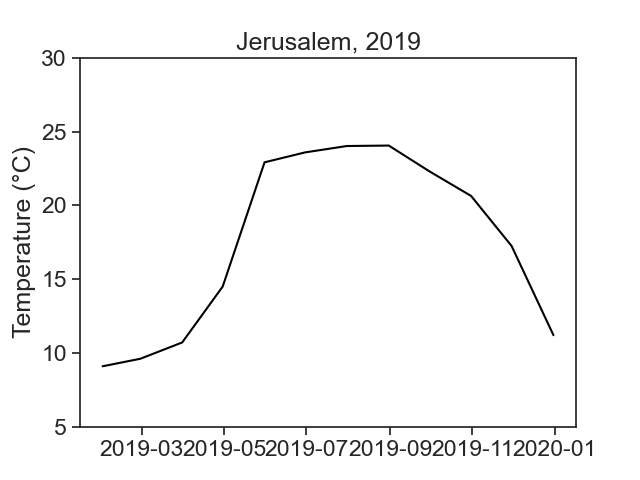

In [5]:
fig, ax = plt.subplots()
ax.plot(df_month['mean temp'], color='black')
ax.set(ylabel='Temperature (°C)',
       yticks=np.arange(5,35,5),
       title="Jerusalem, 2019")

Although all the calculations are correct, the graph is not great.

* Each monthly average was assigned to the last day of the month.
* The ticks on the x-axis are on the first of the month, so there is a mismatch between data and labels.

We will resample now using `MS`, which assigns the result to the first of the month (Month Start), and we will then add 14 more days to it (left offset), so that every point is assigned to the middle (15th) of the month.

In [6]:
df_month = df['temperature'].resample('MS',loffset=pd.Timedelta(14, 'd')).mean().to_frame('mean temp')
df_month

,mean temp
date,
2019-01-15,9.119937
2019-02-15,9.629812
2019-03-15,10.731571
2019-04-15,14.514329
2019-05-15,22.916894
2019-06-15,23.587361
2019-07-15,24.019403
2019-08-15,24.050822
2019-09-15,22.313287


Now let's plot again, and we'll choose a cleaner x-axis labeling.

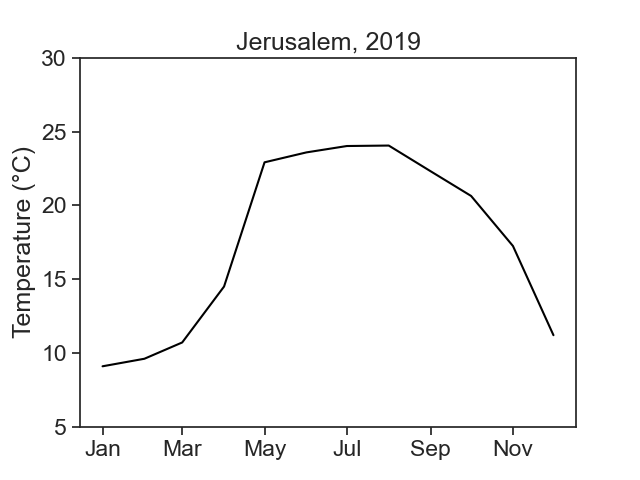

In [7]:
fig, ax = plt.subplots()
ax.plot(df_month['mean temp'], color='black')
ax.set(ylabel='Temperature (°C)',
       yticks=np.arange(5,35,5),
       title="Jerusalem, 2019")
ax.xaxis.set_major_locator(mdates.MonthLocator(range(1, 13, 2), bymonthday=15))
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)

We're done! Congratulations :)

Now we need to calculate the average minimum/maximum daily temperatures. We start by creating an empty dataframe.

In [8]:
df_day = pd.DataFrame()

Now resample data by day (`D`), and take the min/max of each day.

In [9]:
df_day['min temp'] = df['temperature'].resample('D').min()
df_day['max temp'] = df['temperature'].resample('D').max()
df_day

,min temp,max temp
date,,
2019-01-01,7.5,14.1
2019-01-02,6.6,11.5
2019-01-03,6.3,10.7
2019-01-04,6.6,14.6
2019-01-05,7.0,11.4
...,...,...
2019-12-27,4.4,7.4
2019-12-28,6.6,10.3
2019-12-29,8.1,12.5


The next step is to calculate the average minimum/maximum for each month. This is similar to what we did above.

In [10]:
df_month['min temp'] = df_day['min temp'].resample('MS',loffset=pd.Timedelta(14, 'd')).mean()
df_month['max temp'] = df_day['max temp'].resample('MS',loffset=pd.Timedelta(14, 'd')).mean()
df_month

,mean temp,min temp,max temp
date,,,
2019-01-15,9.119937,5.922581,12.470968
2019-02-15,9.629812,6.825000,13.089286
2019-03-15,10.731571,7.532258,14.661290
2019-04-15,14.514329,10.866667,19.113333
2019-05-15,22.916894,17.296774,29.038710
2019-06-15,23.587361,19.163333,28.860000
2019-07-15,24.019403,19.367742,29.564516
2019-08-15,24.050822,19.903226,29.767742
2019-09-15,22.313287,18.430000,28.456667


Let's plot...

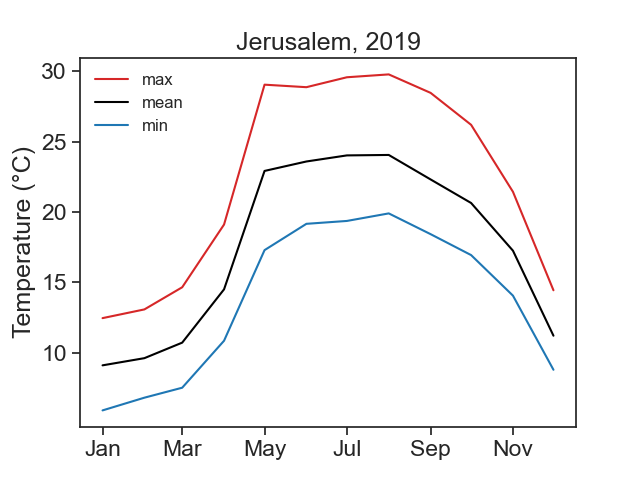

In [11]:
fig, ax = plt.subplots()
ax.plot(df_month['max temp'], color='tab:red', label='max')
ax.plot(df_month['mean temp'], color='black', label='mean')
ax.plot(df_month['min temp'], color='tab:blue', label='min')
ax.set(ylabel='Temperature (°C)',
       yticks=np.arange(10,35,5),
       title="Jerusalem, 2019")
ax.xaxis.set_major_locator(mdates.MonthLocator(range(1, 13, 2), bymonthday=15))
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.legend(fontsize=12, frameon=False);

Voilà! You made a beautiful graph!